
In the previous lesson (TODO: put link) we have already seen **Magic Methods** like `__init__` and `__repr__`.

Magic Methods allows us to override functionality and create powerful interfaces for objects. They are methods that you don't explicitly call and they're automatically called in some situations. For instance, when you create an instance of a class, you don't actually call `AClass.__init__()`, but the `__init__()` is automatically called when you create an instance of a class.

Let's define two classes to use as examples:

In [1]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.family = None
        self.cousins = []

    def __repr__(self):
        fam_name = ''
        if self.family:
            fam_name = f" {self.family.name}"
        return f"{self.name}{fam_name} - {self.age}"


class Family:
    def __init__(self, name):
        self.name = name
        self.members = []

    def __repr__(self):
        return "\n".join(str(x) for x in self.members)

Let's create an instance of this class:

In [2]:
jake = Person(name="Jake", age=33)

I'm not actually calling the dunder `__init__()` method, but Python knows that, when you instantiate a class, it needs to call the dunder `__init__()` method. Actually Python is calling another magic method (`__new__()`) before it ever calls `__init__()` and `__new__()` passes along the self object to dunder `__init__()`. So, when we're instantiating a `Person`, Python is calling `__new__()` which then calls `__init__()`.

Another magic method is `__repr__()`, that is considered the string-representation of a class. The best practice for this dunder method is to return a string that let you able to recreate the class later on:

In [3]:
jake

Jake - 33

It's just a convention, not a rule. Indeed, for `Family` class we used another pattern:

In [4]:
amanda = Person(name="Amanda", age=29)
kiara = Person(name="Kiara", age=13)

my_family = Family(name="Callahan")

print(jake)
print(amanda)
print(kiara)
print(my_family)

Jake - 33
Amanda - 29
Kiara - 13



For now, `my_family` returns an empty space because `self.members` is an empty list. We'll populate it later on.

## `__del__()`

Now let's cover another dunder method which has a lot of confusion around it: `__del__()`. We can consider this method as the opposite of `__init__()`.

`__del__()` method gets ran when an object is garbage collected. Without going into details about this topic, let's just say that Python has its own built-in **garbage collection system** that works by **counting references**: an object's reference count is increased anytime that something else is actively referring ot that object. On the other hand, the object's reference count is decreased anytime something go out of scope. Since these variables are global to this file, that will happen when the file stop running.

To demonstrate this phenomenon, we can redefine the __del__() method in the Person class and run the code in a `.py` file instead of a Jupyter notebook. Since we are using a Jupyter notebook, I'll provide attach a screenshot of what the output would look like if the file were executed:

In [5]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.family = None
        self.cousins = []

    def __repr__(self):
        fam_name = ''
        if self.family:
            fam_name = f" {self.family.name}"
        return f"{self.name}{fam_name} - {self.age}"
    
    def __del__(self):
        print(f"{self.name} waves goodbye")

jake = Person(name="Jake", age=33)
amanda = Person(name="Amanda", age=29)
kiara = Person(name="Kiara", age=13)
my_family = Family(name="Callahan")

The screenshot:

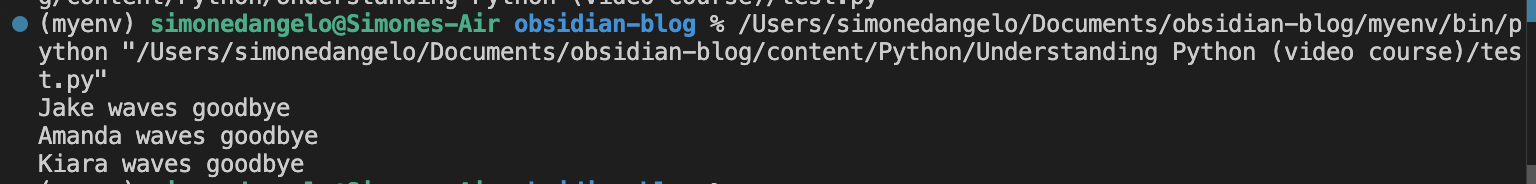

These print statements where ran right before the script itself finished executing as there's no more references to those objects.

## `__add__()`

We want to create now a method to add members to a family and we'll do it `__add__()` magic method:

In [12]:
class Family:
    def __init__(self, name):
        self.name = name
        self.members = []

    def __repr__(self):
        return "\n".join(str(x) for x in self.members)
    
    def __add__(self, obj):
        if isinstance(obj, Person):
            setattr(self, obj.name, obj)
            obj.family = self
            self.members.append(obj)

* `if isinstance(obj, Person)`: we are ensuring that only instances of the `Person` class can be added to the `Family`. It prevents adding any arbitrary object that doesn’t belong to the Person class.
* `setattr(self, obj.name, obj)`: this allows us to do things like `my_family.Jake` and this will reference the `jake` object (pay attention to lower and upper case letters: we used names with uppercase because `setattr` method takes the name of the `Person` instance, which start with a capital letter).
* `obj.family = self`: a person added to a family will have a record of what family belong to; this allows us to do things like `jake.family.name`.
* `self.members.append(obj)`: This line adds the `Person` instance to the members list of the Family. It keeps a collection of all the people who are part of the family.

Let's run:

In [16]:
my_family = Family(name="Callahan")

my_family + jake
my_family + amanda
my_family + kiara

print(my_family.Jake)
print(my_family.Amanda)
print(my_family.Kiara)
print(f"Jake's family: {jake.family.name}")

Jake Callahan - 33
Amanda Callahan - 29
Kiara Callahan - 13
Jake's family: Callahan


Note that now `members` attribute of `my_family` instance is populated. Recall that before print(my_family.members) returned an empty string, but now it returns a meaningful result:

In [17]:
print(my_family)

Jake Callahan - 33
Amanda Callahan - 29
Kiara Callahan - 13


## `__lt__()`

Remember that at the beginning, we defined an attribute in the `Person` class called `cousins`. Currently, we don’t have a way to link cousins together, but in the real world, cousins are typically linked through two connected families.

The way we're gonna imeplement this is with another magic command that doesn't make sense by itself. It's more of what's called syntactic sugar. `__lt__` method is what's called when you try determine if an object is less than another oject and obviously this doesn't make sense to check to see if one family is less than another family. So, we can use the character to represent a different kind of addition or assignment:

In [25]:
class Family:
    def __init__(self, name):
        self.name = name
        self.members = []

    def __repr__(self):
        return "\n".join(str(x) for x in self.members)
    
    def __add__(self, obj):
        if isinstance(obj, Person):
            setattr(self, obj.name, obj)
            obj.family = self
            self.members.append(obj)

    def __lt__(self, obj):
        if isinstance(obj, Family):
            for my_member in self.members:
                for their_member in obj.members:
                    my_member.cousins.append(their_member)
                    their_member.cousins.append(my_member)

With this implementation assign each member of a family as cousins of the other family and viceversa. So, let's create another family and add some members to it:

In [34]:
my_family = Family(name="Callahan")
my_family + jake
my_family + amanda
my_family + kiara


smiths = Family(name="Smith")
smiths + Person(name='James', age=30)
smiths + Person(name='Rick', age=31)

Now, let's use the `__lt__()` method:

In [35]:
my_family < smiths

In [37]:
print("---- My Family -----")
print(my_family)
print("\n")
print("---- The Smiths -----")
print(smiths)
print("\n")
print(f"Jake's cousins: {jake.cousins}")
print(f"Jake's cousins: {smiths.James.cousins}")

---- My Family -----
Jake Callahan - 33
Amanda Callahan - 29
Kiara Callahan - 13


---- The Smiths -----
James Smith - 30
Rick Smith - 31


Jake's cousins: [James Smith - 30, Rick Smith - 31]
Jake's cousins: [Jake Callahan - 33, Amanda Callahan - 29, Kiara Callahan - 13]


## `__contains__()`

Let's define `__contains__()` to have a bit more control over membership checking. We want to check if a certain person is in the family and a place that we store that information is in `self.members`:

In [38]:
class Family:
    def __init__(self, name):
        self.name = name
        self.members = []

    def __repr__(self):
        return "\n".join(str(x) for x in self.members)
    
    def __add__(self, obj):
        if isinstance(obj, Person):
            setattr(self, obj.name, obj)
            obj.family = self
            self.members.append(obj)

    def __lt__(self, obj):
        if isinstance(obj, Family):
            for my_member in self.members:
                for their_member in obj.members:
                    my_member.cousins.append(their_member)
                    their_member.cousins.append(my_member)

    def __contains__(self, obj):
        return obj in self.members

In [39]:
my_family = Family(name="Callahan")
my_family + jake
my_family + amanda
my_family + kiara


smiths = Family(name="Smith")
smiths + Person(name='James', age=30)
smiths + Person(name='Rick', age=31)

In [40]:
print(f"Jake in Callahans? {jake in my_family}")
print(f"Jake in Callahans? {jake in smiths}")

Jake in Callahans? True
Jake in Callahans? False
